In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as splt

In [3]:
df = pd.read_csv('../EDA/Data_preparada/nueocv.csv')
df.head()

,Pais,Año,Indicador,Valor,Indicador_name
0,AUS,1987,FP.CPI.TOTL.ZG,8.533022,"Inflation, consumer prices (annual %)"
1,AUS,1988,FP.CPI.TOTL.ZG,7.215940,"Inflation, consumer prices (annual %)"
2,AUS,1989,FP.CPI.TOTL.ZG,7.533903,"Inflation, consumer prices (annual %)"
3,AUS,1990,FP.CPI.TOTL.ZG,7.333022,"Inflation, consumer prices (annual %)"
4,AUS,1991,FP.CPI.TOTL.ZG,3.176675,"Inflation, consumer prices (annual %)"


In [4]:
df_pivot = pd.pivot_table(data=df, index=['Pais', "Año"], columns='Indicador_name', values='Valor')
df_pivot.reset_index(inplace=True)
df_pivot

Indicador_name,Pais,Año,GDP per capita (current US$),GDP per capita growth (annual %),"Inflation, GDP deflator (annual %)","Inflation, consumer prices (annual %)","Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)","Population ages 0-14, female",...,"Population ages 65 and above, male","Population ages 65 and above, total",Population growth (annual %),"Population, female","Population, male","Population, total",Rural population,Rural population growth (annual %),Urban population,Urban population growth (annual %)
0,AFG,1987,NaN,NaN,NaN,NaN,43.453000,36.7390,39.844000,2387348.0,...,111022.0,233845.0,-1.210190,5152650.0,5170108.0,10322758.0,8225793.0,-2.043746,2096965.0,2.128391
1,AFG,1988,NaN,NaN,NaN,NaN,46.569000,41.5720,43.958000,2406727.0,...,110633.0,233853.0,0.586318,5188060.0,5195399.0,10383460.0,8203141.0,-0.275758,2180319.0,3.898014
2,AFG,1989,NaN,NaN,NaN,NaN,47.610000,42.8910,45.158000,2479055.0,...,113325.0,240097.0,2.751877,5334609.0,5338559.0,10673168.0,8422410.0,2.637888,2250758.0,3.179585
3,AFG,1990,NaN,NaN,NaN,NaN,48.397000,43.7090,45.967000,2490400.0,...,113182.0,240267.0,0.202434,5346409.0,5348387.0,10694796.0,8429959.0,0.089590,2264837.0,0.623574
4,AFG,1991,NaN,NaN,NaN,NaN,49.144000,44.3530,46.663000,2510102.0,...,113494.0,241354.0,0.469880,5372208.0,5372959.0,10745167.0,8460100.0,0.356909,2285067.0,0.889255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1579,ZAF,2018,7048.508112,0.285736,3.745754,4.517165,68.740000,62.2030,65.674000,8077191.0,...,1151914.0,3356734.0,1.225530,29517286.0,27822349.0,57339635.0,19291920.0,-0.264285,38047715.0,1.989500
1580,ZAF,2019,6688.774746,-0.987175,4.638081,4.120246,69.107000,62.8340,66.175000,8200552.0,...,1183770.0,3456202.0,1.295074,29879107.0,28207948.0,58087055.0,19252374.0,-0.205198,38834681.0,2.047266
1581,ZAF,2020,5741.641249,-7.481093,5.692615,3.210036,67.964000,62.1780,65.252000,8299706.0,...,1203270.0,3528430.0,1.223179,30221143.0,28580784.0,58801927.0,19196477.0,-0.290761,39605450.0,1.965305
1582,ZAF,2021,7055.055176,3.870315,6.219017,4.611672,64.999000,59.4580,62.341000,8363479.0,...,1200226.0,3546983.0,0.998920,30497646.0,28894608.0,59392255.0,19096392.0,-0.522736,40295863.0,1.728207


In [5]:
df_pivot.dtypes

Indicador_name
Pais                                         object
Año                                           int64
GDP per capita (current US$)                float64
GDP per capita growth (annual %)            float64
Inflation, GDP deflator (annual %)          float64
Inflation, consumer prices (annual %)       float64
Life expectancy at birth, female (years)    float64
Life expectancy at birth, male (years)      float64
Life expectancy at birth, total (years)     float64
Population ages 0-14, female                float64
Population ages 0-14, male                  float64
Population ages 0-14, total                 float64
Population ages 15-64, female               float64
Population ages 15-64, male                 float64
Population ages 15-64, total                float64
Population ages 65 and above, female        float64
Population ages 65 and above, male          float64
Population ages 65 and above, total         float64
Population growth (annual %)                float

In [6]:
df_pivot.columns

Index(['Pais', 'Año', 'GDP per capita (current US$)',
       'GDP per capita growth (annual %)',
       'Inflation, GDP deflator (annual %)',
       'Inflation, consumer prices (annual %)',
       'Life expectancy at birth, female (years)',
       'Life expectancy at birth, male (years)',
       'Life expectancy at birth, total (years)',
       'Population ages 0-14, female', 'Population ages 0-14, male',
       'Population ages 0-14, total', 'Population ages 15-64, female',
       'Population ages 15-64, male', 'Population ages 15-64, total',
       'Population ages 65 and above, female',
       'Population ages 65 and above, male',
       'Population ages 65 and above, total', 'Population growth (annual %)',
       'Population, female', 'Population, male', 'Population, total',
       'Rural population', 'Rural population growth (annual %)',
       'Urban population', 'Urban population growth (annual %)'],
      dtype='object', name='Indicador_name')

In [7]:
df_pivot["ratio_population ages 65 and above"] = df_pivot["Population ages 65 and above, total"]/df_pivot["Population, total"]
df_pivot["ratio_urban population"] = df_pivot["Urban population"]/df_pivot["Population, total"]

In [8]:
columnas_seleccionadas = ["Pais","Año","GDP per capita (current US$)","Inflation, GDP deflator (annual %)", "Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)","Population growth (annual %)","ratio_population ages 65 and above","ratio_urban population", "Urban population growth (annual %)"]

In [9]:
df_pivot = df_pivot[columnas_seleccionadas]

In [10]:
df_pivot_años = df_pivot[df_pivot["Año"].isin([2018,2019,2020,2021,2022])]
df_pivot_años.reset_index(drop=True, inplace=True)
df_pivot_años

Indicador_name,Pais,Año,GDP per capita (current US$),"Inflation, GDP deflator (annual %)","Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Population growth (annual %),ratio_population ages 65 and above,ratio_urban population,Urban population growth (annual %)
0,AFG,2018,NaN,NaN,NaN,63.081000,2.885208,0.024071,0.25495,3.850833
1,AFG,2019,NaN,NaN,NaN,63.565000,2.908529,0.024178,0.25754,3.919287
2,AFG,2020,NaN,NaN,NaN,62.575000,3.134747,0.024170,0.26026,4.185357
3,AFG,2021,NaN,NaN,NaN,61.982000,2.851358,0.024041,0.26314,3.951857
4,AFG,2022,NaN,NaN,NaN,56.221029,2.534498,0.023943,0.26616,3.675647
...,...,...,...,...,...,...,...,...,...,...
215,ZAF,2018,7048.508112,3.745754,4.517165,65.674000,1.225530,0.058541,0.66355,1.989500
216,ZAF,2019,6688.774746,4.638081,4.120246,66.175000,1.295074,0.059500,0.66856,2.047266
217,ZAF,2020,5741.641249,5.692615,3.210036,65.252000,1.223179,0.060005,0.67354,1.965305
218,ZAF,2021,7055.055176,6.219017,4.611672,62.341000,0.998920,0.059721,0.67847,1.728207


In [11]:
df_pivot_años.fillna(0, inplace=True)
df_pivot_años

C:\Users\felix\AppData\Local\Temp\ipykernel_13176\3946676365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pivot_años.fillna(0, inplace=True)


Indicador_name,Pais,Año,GDP per capita (current US$),"Inflation, GDP deflator (annual %)","Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Population growth (annual %),ratio_population ages 65 and above,ratio_urban population,Urban population growth (annual %)
0,AFG,2018,0.000000,0.000000,0.000000,63.081000,2.885208,0.024071,0.25495,3.850833
1,AFG,2019,0.000000,0.000000,0.000000,63.565000,2.908529,0.024178,0.25754,3.919287
2,AFG,2020,0.000000,0.000000,0.000000,62.575000,3.134747,0.024170,0.26026,4.185357
3,AFG,2021,0.000000,0.000000,0.000000,61.982000,2.851358,0.024041,0.26314,3.951857
4,AFG,2022,0.000000,0.000000,0.000000,56.221029,2.534498,0.023943,0.26616,3.675647
...,...,...,...,...,...,...,...,...,...,...
215,ZAF,2018,7048.508112,3.745754,4.517165,65.674000,1.225530,0.058541,0.66355,1.989500
216,ZAF,2019,6688.774746,4.638081,4.120246,66.175000,1.295074,0.059500,0.66856,2.047266
217,ZAF,2020,5741.641249,5.692615,3.210036,65.252000,1.223179,0.060005,0.67354,1.965305
218,ZAF,2021,7055.055176,6.219017,4.611672,62.341000,0.998920,0.059721,0.67847,1.728207


In [12]:
df_pivot_años_group = df_pivot_años.groupby("Pais").mean().drop(columns=['Año'])
df_pivot_años_group.reset_index(inplace=True)
df_pivot_años_group

Indicador_name,Pais,GDP per capita (current US$),"Inflation, GDP deflator (annual %)","Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Population growth (annual %),ratio_population ages 65 and above,ratio_urban population,Urban population growth (annual %)
0,AFG,0.000000,0.000000,0.000000,61.484806,2.862868,0.024080,0.260410,3.916596
1,ARE,45560.206232,4.169056,0.000000,78.561194,0.805824,0.015864,0.870402,1.103889
2,ARG,10915.477895,51.028281,0.000000,76.013977,0.970517,0.117056,0.921096,1.100450
3,AUS,57761.211526,3.376449,2.765416,82.451958,1.095506,0.162611,0.862454,1.231012
4,AUT,51223.067832,2.572042,3.244945,80.976000,0.549274,0.192157,0.587622,0.945365
5,BFA,822.115089,2.952730,3.710152,58.543623,2.674342,0.025542,0.306124,4.744150
6,BRA,8300.900730,6.971511,5.638272,73.595800,0.642645,0.092899,0.870676,0.929311
7,CAN,48719.347253,3.856999,3.026498,81.633581,1.264236,0.180586,0.815720,1.362825
8,CHE,87817.593370,0.851901,0.798038,83.043164,0.738462,0.187840,0.739298,0.828011
9,CHN,11159.141215,2.415897,2.069607,77.042154,0.227321,0.125945,0.613920,2.071946


In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

columnas = df_pivot_años_group.columns[1:]

df_pivot_años_group_escaler = scaler.fit_transform(df_pivot_años_group[columnas])

df_pivot_años_group_escaler = pd.DataFrame(df_pivot_años_group_escaler, columns=df_pivot_años_group.columns[1:])

df_pivot_años_group_escaler


Indicador_name,GDP per capita (current US$),"Inflation, GDP deflator (annual %)","Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Population growth (annual %),ratio_population ages 65 and above,ratio_urban population,Urban population growth (annual %)
0,-0.929548,-0.520190,-1.163894,-1.532339,1.865285,-1.210265,-1.548677,1.733677
1,0.828417,-0.241823,-1.163894,0.590992,-0.202967,-1.324021,0.849362,-0.334564
2,-0.508368,2.886956,-1.163894,0.274263,-0.037377,0.076998,1.048653,-0.337093
3,1.299199,-0.294745,-0.155949,1.074782,0.088293,0.707716,0.818116,-0.241089
4,1.046921,-0.348455,0.018831,0.891256,-0.460915,1.116775,-0.262321,-0.451130
5,-0.897826,-0.323037,0.188391,-1.898055,1.675732,-1.190024,-1.368964,2.342194
6,-0.609253,-0.054704,0.891156,-0.026420,-0.367035,-0.257460,0.850439,-0.462935
7,0.950314,-0.262659,-0.060789,0.973022,0.257943,0.956574,0.634392,-0.144163
8,2.458941,-0.463309,-0.873023,1.148294,-0.270696,1.057015,0.333957,-0.537423
9,-0.498966,-0.358881,-0.409559,0.402110,-0.784622,0.200067,-0.158937,0.377268


In [15]:
#df_pivot_años_group_escaler.to_csv('data_ML.csv',index=False)

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [17]:
num_clusters = 5

kmeans = KMeans(n_clusters=num_clusters, random_state=42)

In [18]:
kmeans.fit(df_pivot_años_group_escaler)

cluster_labels = kmeans.labels_

df_pivot_años_group_escaler_cluster = df_pivot_años_group_escaler.assign(Cluster=cluster_labels)

C:\Users\felix\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [19]:
df_pivot_años_group_escaler_cluster

Indicador_name,GDP per capita (current US$),"Inflation, GDP deflator (annual %)","Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Population growth (annual %),ratio_population ages 65 and above,ratio_urban population,Urban population growth (annual %),Cluster
0,-0.929548,-0.520190,-1.163894,-1.532339,1.865285,-1.210265,-1.548677,1.733677,4
1,0.828417,-0.241823,-1.163894,0.590992,-0.202967,-1.324021,0.849362,-0.334564,0
2,-0.508368,2.886956,-1.163894,0.274263,-0.037377,0.076998,1.048653,-0.337093,2
3,1.299199,-0.294745,-0.155949,1.074782,0.088293,0.707716,0.818116,-0.241089,1
4,1.046921,-0.348455,0.018831,0.891256,-0.460915,1.116775,-0.262321,-0.451130,1
5,-0.897826,-0.323037,0.188391,-1.898055,1.675732,-1.190024,-1.368964,2.342194,4
6,-0.609253,-0.054704,0.891156,-0.026420,-0.367035,-0.257460,0.850439,-0.462935,0
7,0.950314,-0.262659,-0.060789,0.973022,0.257943,0.956574,0.634392,-0.144163,1
8,2.458941,-0.463309,-0.873023,1.148294,-0.270696,1.057015,0.333957,-0.537423,1
9,-0.498966,-0.358881,-0.409559,0.402110,-0.784622,0.200067,-0.158937,0.377268,0


In [20]:
df_pivot_años_group_escaler_cluster

Indicador_name,GDP per capita (current US$),"Inflation, GDP deflator (annual %)","Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Population growth (annual %),ratio_population ages 65 and above,ratio_urban population,Urban population growth (annual %),Cluster
0,-0.929548,-0.520190,-1.163894,-1.532339,1.865285,-1.210265,-1.548677,1.733677,4
1,0.828417,-0.241823,-1.163894,0.590992,-0.202967,-1.324021,0.849362,-0.334564,0
2,-0.508368,2.886956,-1.163894,0.274263,-0.037377,0.076998,1.048653,-0.337093,2
3,1.299199,-0.294745,-0.155949,1.074782,0.088293,0.707716,0.818116,-0.241089,1
4,1.046921,-0.348455,0.018831,0.891256,-0.460915,1.116775,-0.262321,-0.451130,1
5,-0.897826,-0.323037,0.188391,-1.898055,1.675732,-1.190024,-1.368964,2.342194,4
6,-0.609253,-0.054704,0.891156,-0.026420,-0.367035,-0.257460,0.850439,-0.462935,0
7,0.950314,-0.262659,-0.060789,0.973022,0.257943,0.956574,0.634392,-0.144163,1
8,2.458941,-0.463309,-0.873023,1.148294,-0.270696,1.057015,0.333957,-0.537423,1
9,-0.498966,-0.358881,-0.409559,0.402110,-0.784622,0.200067,-0.158937,0.377268,0


In [21]:
df_pivot_años_group_escaler_cluster = df_pivot_años_group_escaler_cluster.groupby("Cluster").mean()
df_pivot_años_group_escaler_cluster

Indicador_name,GDP per capita (current US$),"Inflation, GDP deflator (annual %)","Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Population growth (annual %),ratio_population ages 65 and above,ratio_urban population,Urban population growth (annual %)
Cluster,,,,,,,,
0,-0.534631,-0.204398,0.166150,-0.088241,0.025418,-0.610146,0.007384,0.020150
1,1.148616,-0.314257,-0.224784,0.953431,-0.519087,1.133251,0.701279,-0.632428
2,-0.617023,3.345621,-1.163894,0.111634,-1.277107,0.077239,0.803256,-1.269691
3,-0.459142,0.133547,4.564785,-0.358281,-1.144566,0.564811,0.366862,-1.078188
4,-0.894242,-0.230703,0.003464,-1.545324,1.433335,-1.086260,-1.567540,1.633762


In [22]:
df_pivot_años_group_escaler_cluster

Indicador_name,GDP per capita (current US$),"Inflation, GDP deflator (annual %)","Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Population growth (annual %),ratio_population ages 65 and above,ratio_urban population,Urban population growth (annual %)
Cluster,,,,,,,,
0,-0.534631,-0.204398,0.166150,-0.088241,0.025418,-0.610146,0.007384,0.020150
1,1.148616,-0.314257,-0.224784,0.953431,-0.519087,1.133251,0.701279,-0.632428
2,-0.617023,3.345621,-1.163894,0.111634,-1.277107,0.077239,0.803256,-1.269691
3,-0.459142,0.133547,4.564785,-0.358281,-1.144566,0.564811,0.366862,-1.078188
4,-0.894242,-0.230703,0.003464,-1.545324,1.433335,-1.086260,-1.567540,1.633762


In [23]:
df_pivot_años_group_cluster = df_pivot_años_group.assign(Cluster=cluster_labels)
df_pivot_años_group_cluster

Indicador_name,Pais,GDP per capita (current US$),"Inflation, GDP deflator (annual %)","Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Population growth (annual %),ratio_population ages 65 and above,ratio_urban population,Urban population growth (annual %),Cluster
0,AFG,0.000000,0.000000,0.000000,61.484806,2.862868,0.024080,0.260410,3.916596,4
1,ARE,45560.206232,4.169056,0.000000,78.561194,0.805824,0.015864,0.870402,1.103889,0
2,ARG,10915.477895,51.028281,0.000000,76.013977,0.970517,0.117056,0.921096,1.100450,2
3,AUS,57761.211526,3.376449,2.765416,82.451958,1.095506,0.162611,0.862454,1.231012,1
4,AUT,51223.067832,2.572042,3.244945,80.976000,0.549274,0.192157,0.587622,0.945365,1
5,BFA,822.115089,2.952730,3.710152,58.543623,2.674342,0.025542,0.306124,4.744150,4
6,BRA,8300.900730,6.971511,5.638272,73.595800,0.642645,0.092899,0.870676,0.929311,0
7,CAN,48719.347253,3.856999,3.026498,81.633581,1.264236,0.180586,0.815720,1.362825,1
8,CHE,87817.593370,0.851901,0.798038,83.043164,0.738462,0.187840,0.739298,0.828011,1
9,CHN,11159.141215,2.415897,2.069607,77.042154,0.227321,0.125945,0.613920,2.071946,0


In [24]:
df_pivot_años_group_cluster['Cluster'] = df_pivot_años_group_cluster['Cluster'].astype("str")

<Axes: xlabel='Cluster', ylabel='Life expectancy at birth, total (years)'>

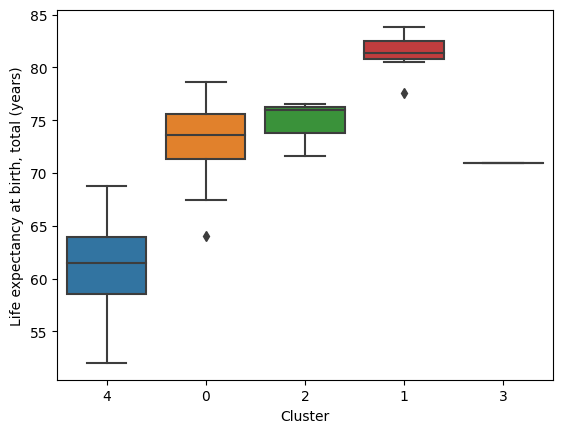

In [25]:
sns.boxplot(data = df_pivot_años_group_cluster , y = 'Life expectancy at birth, total (years)', x = 'Cluster')

<Axes: xlabel='Life expectancy at birth, total (years)', ylabel='Count'>

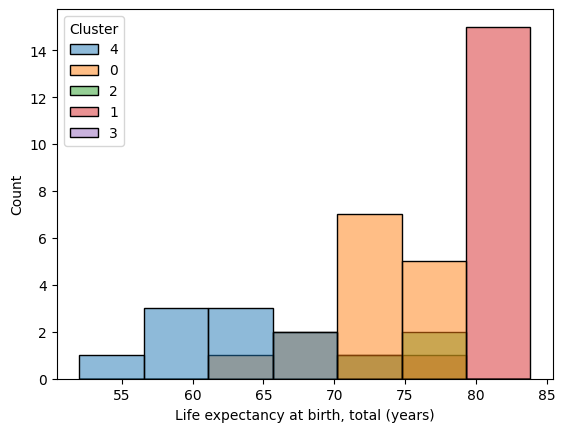

In [26]:
sns.histplot(data=df_pivot_años_group_cluster, x="Life expectancy at birth, total (years)", hue="Cluster")

<Axes: xlabel='Cluster', ylabel='GDP per capita (current US$)'>

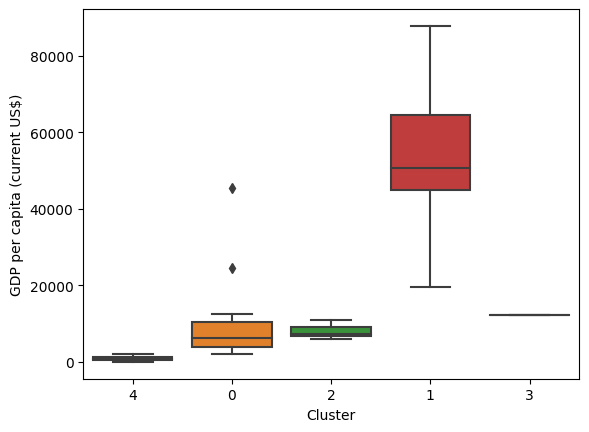

In [27]:
sns.boxplot(data = df_pivot_años_group_cluster , y = 'GDP per capita (current US$)', x = 'Cluster')

<Axes: xlabel='GDP per capita (current US$)', ylabel='Count'>

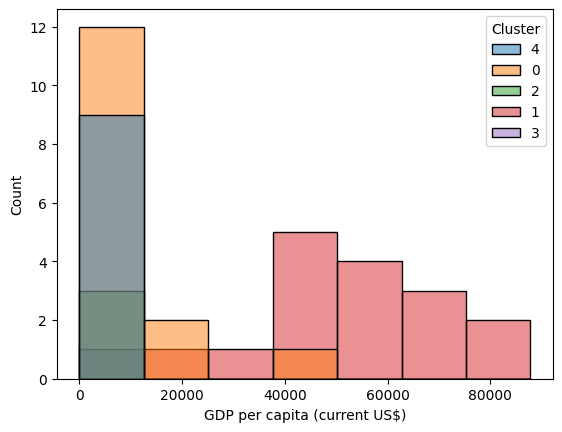

In [28]:
sns.histplot(data=df_pivot_años_group_cluster, x="GDP per capita (current US$)", hue="Cluster")

<Axes: xlabel='Cluster', ylabel='ratio_population ages 65 and above'>

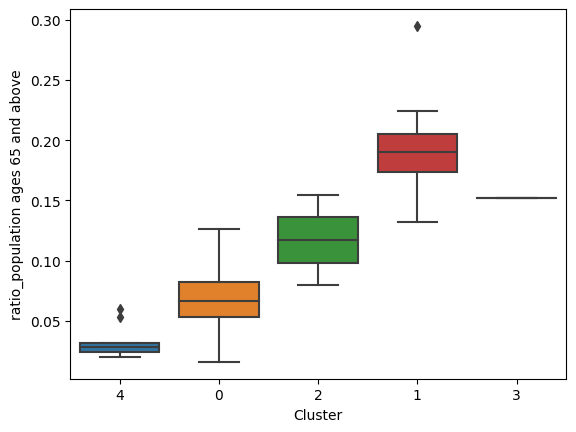

In [29]:
sns.boxplot(data = df_pivot_años_group_cluster , y = 'ratio_population ages 65 and above', x = 'Cluster')

<Axes: xlabel='ratio_population ages 65 and above', ylabel='Count'>

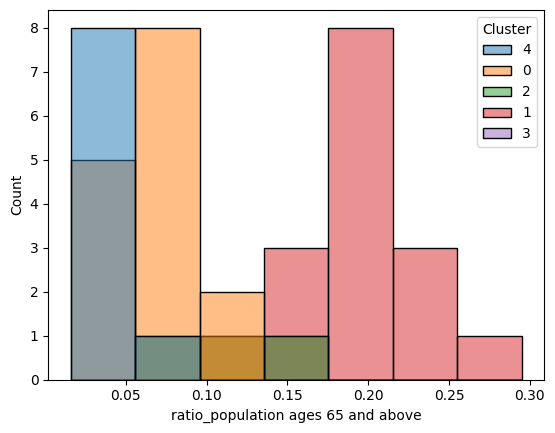

In [30]:
sns.histplot(data=df_pivot_años_group_cluster, x="ratio_population ages 65 and above", hue="Cluster")

<Axes: xlabel='Life expectancy at birth, total (years)', ylabel='GDP per capita (current US$)'>

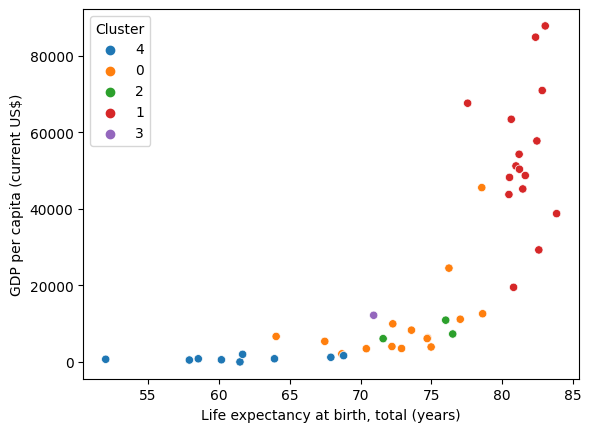

In [31]:
sns.scatterplot(data=df_pivot_años_group_cluster, x="Life expectancy at birth, total (years)", y="GDP per capita (current US$)", hue="Cluster")

In [32]:
df_pivot_años_group_cluster[df_pivot_años_group_cluster["Cluster"]=="1"]

Indicador_name,Pais,GDP per capita (current US$),"Inflation, GDP deflator (annual %)","Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Population growth (annual %),ratio_population ages 65 and above,ratio_urban population,Urban population growth (annual %),Cluster
3,AUS,57761.211526,3.376449,2.765416,82.451958,1.095506,0.162611,0.862454,1.231012,1
4,AUT,51223.067832,2.572042,3.244945,80.976000,0.549274,0.192157,0.587622,0.945365,1
7,CAN,48719.347253,3.856999,3.026498,81.633581,1.264236,0.180586,0.815720,1.362825,1
8,CHE,87817.593370,0.851901,0.798038,83.043164,0.738462,0.187840,0.739298,0.828011,1
13,DEU,48228.360149,2.896613,2.652390,80.521260,0.341339,0.219553,0.774666,0.441269,1
14,DNK,63418.244527,2.958327,2.308413,80.643918,0.473306,0.200320,0.881182,0.611848,1
18,ESP,29274.919471,2.099942,2.707092,82.588962,0.433863,0.197235,0.808112,0.737245,1
19,FIN,50362.716042,2.308397,2.343310,81.221656,0.175927,0.224659,0.855244,0.259196,1
21,GBR,43761.625875,3.042343,3.092170,80.478125,0.274394,0.187323,0.839006,0.574027,1
22,GRC,19496.974134,1.720747,2.099946,80.806632,-0.352987,0.222021,0.797112,0.057636,1


<h2>Gráfico de codo</h2>

In [33]:
valores = []

for i in range(2,11):

  modelo_kmeans_numcluster = KMeans(n_clusters = i, random_state = 123)
  modelo_kmeans_numcluster.fit(df_pivot_años_group_escaler)
  valores.append(modelo_kmeans_numcluster.inertia_)

C:\Users\felix\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\felix\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\felix\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

<Axes: >

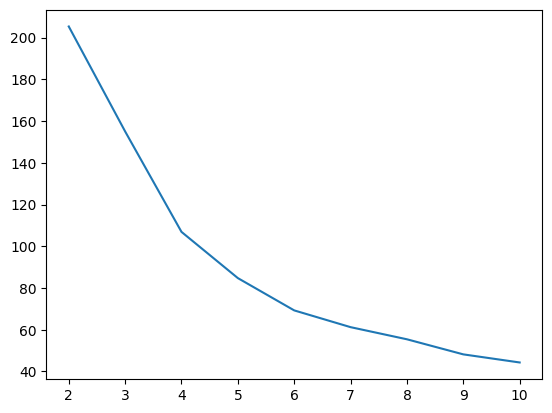

In [34]:
sns.lineplot(x = range(2,11), y = valores)

<h2>Coeficiente de silhoutte</h2>

In [35]:
from sklearn.metrics import silhouette_score, silhouette_samples

scores = []

for i in range(2,11):
  modelo_kmeans_numcluster = KMeans(n_clusters = i, random_state = 123)
  modelo_kmeans_numcluster.fit(df_pivot_años_group_escaler)
  etiquetas = modelo_kmeans_numcluster.labels_
  coef_silhouette = silhouette_score(df_pivot_años_group_escaler, etiquetas)
  scores.append(coef_silhouette)

C:\Users\felix\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\felix\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\felix\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

<Axes: >

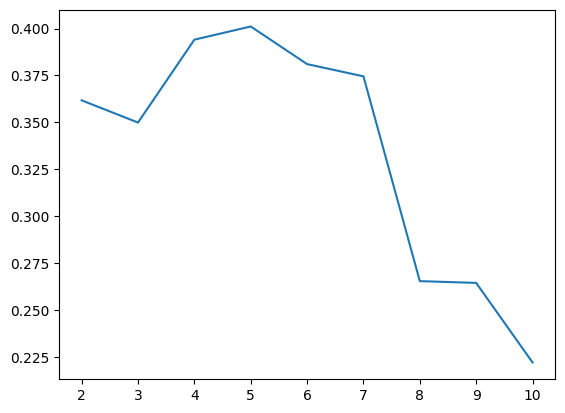

In [36]:
sns.lineplot(x = range(2,11), y = scores)